In [1]:
from langchain_community.tools.arxiv.tool import ArxivQueryRun
from langchain_community.tools.wikipedia.tool import WikipediaQueryRun
from langchain_community.utilities.arxiv import ArxivAPIWrapper
from langchain_community.utilities.wikipedia import WikipediaAPIWrapper

/Users/komya/Desktop/GenAI-2/aienv/lib/python3.14/site-packages/langchain_core/_api/deprecation.py:26: UserWarning: Core Pydantic V1 functionality isn't compatible with Python 3.14 or greater.
  from pydantic.v1.fields import FieldInfo as FieldInfoV1


In [2]:
api_wrapper_wiki = WikipediaAPIWrapper(top_k_results=3,doc_content_chars_max=1000)
wiki = WikipediaQueryRun(api_wrapper=api_wrapper_wiki)
wiki.name

'wikipedia'

In [3]:
api_wrapper_arxiv = ArxivAPIWrapper(top_k_results=3,doc_content_chars_max=1000)
arxiv = ArxivQueryRun(api_wrapper=api_wrapper_arxiv)
arxiv.name

'arxiv'

In [4]:
tools=[arxiv,wiki]

In [6]:
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import FAISS
from langchain_text_splitters import RecursiveCharacterTextSplitter

USER_AGENT environment variable not set, consider setting it to identify your requests.


In [15]:
! pip install faiss-cpu

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 472.1 kB/s  0:00:09 eta 0:00:01


In [13]:
from langchain_community.embeddings import HuggingFaceEmbeddings
embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")


/Users/komya/Desktop/GenAI-2/aienv/lib/python3.14/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [16]:
loader=WebBaseLoader("https://docs.smith.langchain.com/")
docs=loader.load()
documents=RecursiveCharacterTextSplitter(chunk_size=1000,chunk_overlap=200).split_documents(docs)
vectordb=FAISS.from_documents(documents,embeddings)
retriever=vectordb.as_retriever()
retriever

VectorStoreRetriever(tags=['FAISS', 'HuggingFaceEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x12a326ba0>, search_kwargs={})

In [22]:
from langchain_core.tools import Tool

retriever_tool = Tool(
    name="langsmith-search",
    func=retriever.invoke,
    description="Search and retrieve information about LangSmith"
)

retriever_tool.name

'langsmith-search'

In [23]:
tools=[wiki,arxiv,retriever_tool]

In [24]:
tools

[WikipediaQueryRun(api_wrapper=WikipediaAPIWrapper(wiki_client=<module 'wikipedia' from '/Users/komya/Desktop/GenAI-2/aienv/lib/python3.14/site-packages/wikipedia/__init__.py'>, top_k_results=3, lang='en', load_all_available_meta=False, doc_content_chars_max=1000)),
 ArxivQueryRun(api_wrapper=ArxivAPIWrapper(arxiv_search=<class 'arxiv.Search'>, arxiv_exceptions=(<class 'arxiv.ArxivError'>, <class 'arxiv.UnexpectedEmptyPageError'>, <class 'arxiv.HTTPError'>), top_k_results=3, ARXIV_MAX_QUERY_LENGTH=300, continue_on_failure=False, load_max_docs=100, load_all_available_meta=False, doc_content_chars_max=1000)),
 Tool(name='langsmith-search', description='Search and retrieve information about LangSmith', func=<bound method BaseRetriever.invoke of VectorStoreRetriever(tags=['FAISS', 'HuggingFaceEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x12a326ba0>, search_kwargs={})>)]

In [26]:
! pip install langchain-groq

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Using cached groq-0.37.1-py3-none-any.whl.metadata (16 kB)
  Using cached distro-1.9.0-py3-none-any.whl.metadata (6.8 kB)
  Using cached sniffio-1.3.1-py3-none-any.whl.metadata (3.9 kB)
Using cached groq-0.37.1-py3-none-any.whl (137 kB)
Using cached distro-1.9.0-py3-none-any.whl (20 kB)
Using cached sniffio-1.3.1-py3-none-any.whl (10 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [langchain-groq]


In [28]:
## eun all this tools with agents and llm models

from langchain_groq import ChatGroq
from dotenv import load_dotenv
load_dotenv()
import os

groq_api_key=os.getenv("GROQ_API_KEY")

llm=ChatGroq(groq_api_key=groq_api_key,model_name="Llama3-8b-8192")

 

In [33]:
!pip install -U langchainhub

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Using cached packaging-24.2-py3-none-any.whl.metadata (3.2 kB)
  Using cached types_requests-2.32.4.20250913-py3-none-any.whl.metadata (2.0 kB)
Using cached packaging-24.2-py3-none-any.whl (65 kB)
Using cached types_requests-2.32.4.20250913-py3-none-any.whl (20 kB)
  Attempting uninstall: packaging
    Found existing installation: packaging 25.0
    Uninstalling packaging-25.0:
      Successfully uninstalled packaging-25.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [langchainhub]


In [38]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

prompt = ChatPromptTemplate.from_messages([
    ("system", "You are a helpful AI assistant. Use tools when needed."),
    MessagesPlaceholder(variable_name="chat_history"),
    ("human", "{input}"),
    MessagesPlaceholder(variable_name="agent_scratchpad"),
])

In [41]:
!pip install -U langgraph

/opt/homebrew/Cellar/python@3.14/3.14.0_1/Frameworks/Python.framework/Versions/3.14/lib/python3.14/pty.py:66: DeprecationWarning: This process (pid=5029) is multi-threaded, use of forkpty() may lead to deadlocks in the child.
  pid, fd = os.forkpty()
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


/var/folders/gj/68_4f5d96vg7hr3x576llpxh0000gn/T/ipykernel_5029/922545165.py:3: LangGraphDeprecatedSinceV10: create_react_agent has been moved to `langchain.agents`. Please update your import to `from langchain.agents import create_agent`. Deprecated in LangGraph V1.0 to be removed in V2.0.
  agent = create_react_agent(


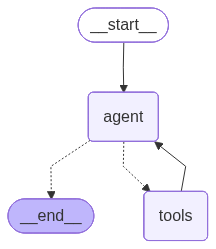

In [44]:
from langgraph.prebuilt import create_react_agent

agent = create_react_agent(
    model=llm,
    tools=tools
)
agent

In [47]:
response = agent.invoke(
    {
        "messages": [
            ("human", "Tell me about LangSmith")
        ]
    }
)

response

BadRequestError: Error code: 400 - {'error': {'message': 'The model `llama3-8b-8192` has been decommissioned and is no longer supported. Please refer to https://console.groq.com/docs/deprecations for a recommendation on which model to use instead.', 'type': 'invalid_request_error', 'code': 'model_decommissioned'}}